In [300]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [301]:
from collections import Counter
from sklearn.cluster import OPTICS
import pandas as pd
from src.utils_clustering import *
import time

In [302]:
N_CLASSES = 15

In [303]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [304]:
# Start measuring time
start_time = time.time()

optics_clustering = OPTICS(min_samples=40, xi=0.001, min_cluster_size=0.04)
labels_pred = optics_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

In [305]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({8: 357, 2: 348, 7: 346, 10: 346, 4: 341, 1: 335, 6: 335, 3: 334, 14: 333, 12: 325, 5: 325, 11: 312, 13: 311, 9: 307, 0: 297, -1: 48})


In [306]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [307]:
clustering_algorithm_name = 'OPTICS_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

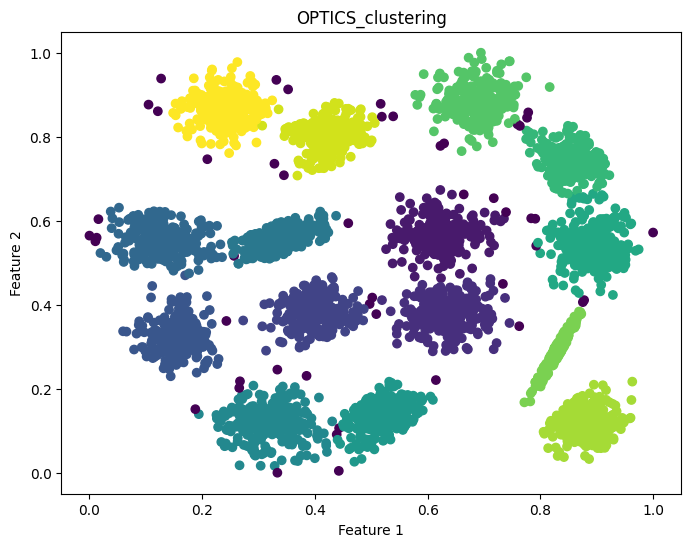

In [308]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [309]:
labels_pred = map_clusters_to_ground_truth_optics(labels_true, labels_pred)

Confusion Matrix:


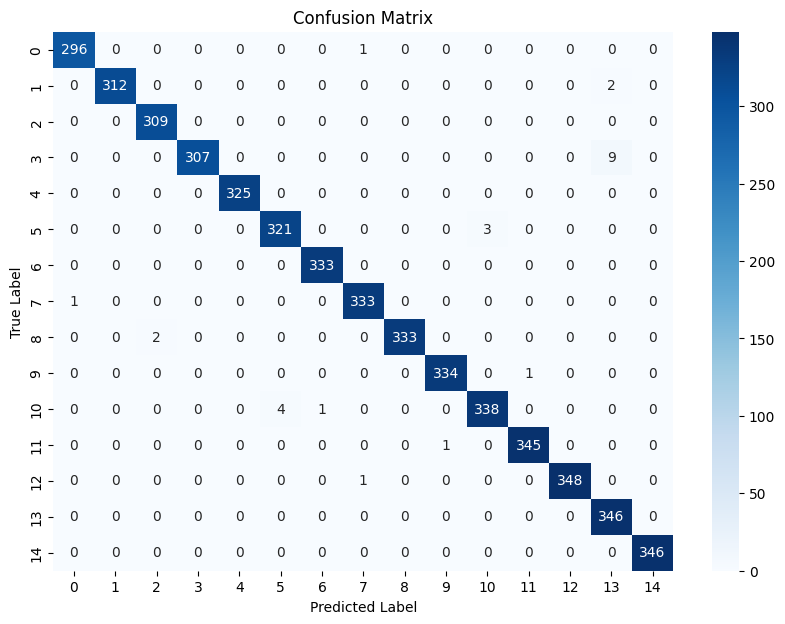

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 99.66%
Cluster 2 Accuracy: 99.36%
Cluster 3 Accuracy: 100.00%
Cluster 4 Accuracy: 97.15%
Cluster 5 Accuracy: 100.00%
Cluster 6 Accuracy: 99.07%
Cluster 7 Accuracy: 100.00%
Cluster 8 Accuracy: 99.70%
Cluster 9 Accuracy: 99.40%
Cluster 10 Accuracy: 99.70%
Cluster 11 Accuracy: 98.54%
Cluster 12 Accuracy: 99.71%
Cluster 13 Accuracy: 99.71%
Cluster 14 Accuracy: 100.00%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 98.52%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [310]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [311]:
algorithm_params = optics_clustering.get_params()
algorithm_details = str(algorithm_params)

In [312]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 02:30:17.901021
Dataset: s1
Clustering Algorithm: OPTICS_clustering
Algorithm Details: {'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': inf, 'memory': None, 'metric': 'minkowski', 'metric_params': None, 'min_cluster_size': 0.04, 'min_samples': 40, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.001}
Running Time (seconds): 1.6536107063293457
Accuracy: 0.9852
